<a href="https://colab.research.google.com/github/caiohc28/cp5-ia/blob/main/Cp5_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_wine, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import math
import os
import random
import matplotlib.pyplot as plt

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)


# **EXERCICIO 1**

In [9]:
data = load_wine()
X = data.data
y = data.target
target_names = data.target_names


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


y_train_cat = keras.utils.to_categorical(y_train, num_classes=3)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=3)

print("Wine dataset:", X.shape, "classes:", np.unique(y))
print("Treino:", X_train.shape, "Test:", X_test.shape)


Wine dataset: (178, 13) classes: [0 1 2]
Treino: (142, 13) Test: (36, 13)


In [10]:
def build_wine_keras_model(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_wine = build_wine_keras_model(X_train_scaled.shape[1])

history = model_wine.fit(X_train_scaled, y_train_cat,
                         validation_split=0.1,
                         epochs=50,
                         batch_size=16,
                         verbose=0)

pred_proba = model_wine.predict(X_test_scaled, verbose=0)
pred_classes = np.argmax(pred_proba, axis=1)
acc_keras_wine = accuracy_score(y_test, pred_classes)

print(f"Modelo Keras treinado. Acurácia (test): {acc_keras_wine:.4f}")


Modelo Keras treinado. Acurácia (test): 0.9722


In [11]:
lr = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=SEED, solver='lbfgs')
lr.fit(X_train_scaled, y_train)
pred_lr = lr.predict(X_test_scaled)
acc_lr = accuracy_score(y_test, pred_lr)


print(f"Modelo Keras: {acc_keras_wine*100:.2f}% de acurácia.")
print(f"Modelo LogisticRegression: {acc_lr*100:.2f}% de acurácia.")
if acc_lr > acc_keras_wine:
    print("=> LogisticRegression performou melhor.")
elif acc_lr < acc_keras_wine:
    print("=> Keras performou melhor.")
else:
    print("=> Ambos performaram igual.")


Modelo Keras: 97.22% de acurácia.
Modelo LogisticRegression: 97.22% de acurácia.
=> Ambos performaram igual.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


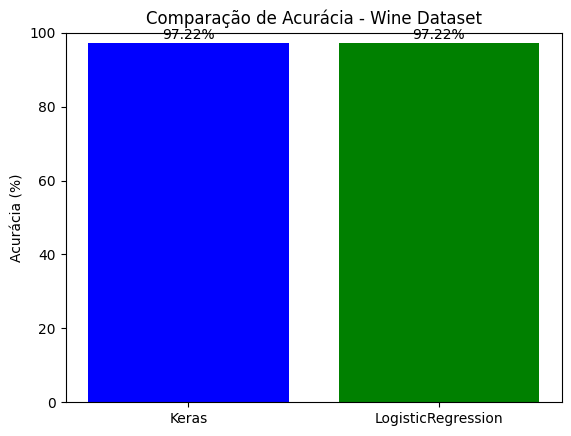

In [12]:
modelos = ['Keras', 'LogisticRegression']
acuracia = [97.22, 97.22]

plt.bar(modelos, acuracia, color=['blue', 'green'])
plt.ylim(0, 100)
plt.ylabel('Acurácia (%)')
plt.title('Comparação de Acurácia - Wine Dataset')
for i, v in enumerate(acuracia):
    plt.text(i, v + 1, f"{v}%", ha='center')
plt.show()


# **EXERCICIO 2**

In [13]:
housing = fetch_california_housing()
X = housing.data
y = housing.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)


scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

print("California Housing:", X.shape)
print("Treino:", X_train.shape, "Test:", X_test.shape)


California Housing: (20640, 8)
Treino: (16512, 8) Test: (4128, 8)


In [14]:
def build_housing_keras_model(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model_housing = build_housing_keras_model(X_train_scaled.shape[1])

history = model_housing.fit(X_train_scaled, y_train,
                            validation_split=0.1,
                            epochs=100,
                            batch_size=32,
                            verbose=0)

pred_keras = model_housing.predict(X_test_scaled, verbose=0).ravel()
rmse_keras = math.sqrt(mean_squared_error(y_test, pred_keras))

print(f"Modelo Keras treinado. RMSE (test): {rmse_keras:.4f}")


Modelo Keras treinado. RMSE (test): 0.5274


In [15]:
lr_reg = LinearRegression()
lr_reg.fit(X_train_scaled, y_train)
pred_lr = lr_reg.predict(X_test_scaled)
rmse_lr = math.sqrt(mean_squared_error(y_test, pred_lr))


print(f"Modelo Keras (RMSE): {rmse_keras:.4f}")
print(f"Modelo LinearRegression (RMSE): {rmse_lr:.4f}")

if rmse_lr < rmse_keras:
    print("=> LinearRegression performou melhor (menor RMSE).")
elif rmse_lr > rmse_keras:
    print("=> Keras performou melhor (menor RMSE).")
else:
    print("=> Ambos tiveram RMSE igual.")


Modelo Keras (RMSE): 0.5274
Modelo LinearRegression (RMSE): 0.7456
=> Keras performou melhor (menor RMSE).


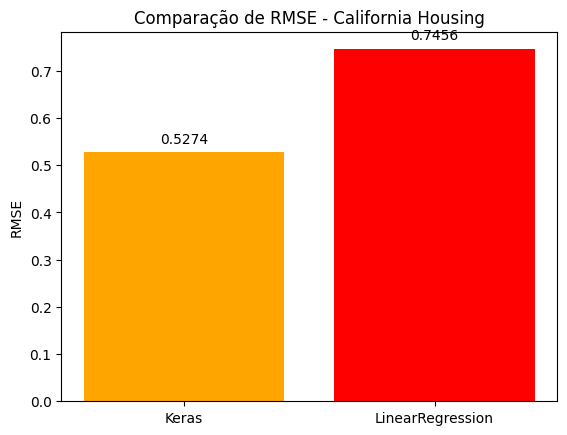

In [16]:
modelos = ['Keras', 'LinearRegression']
rmse = [0.5274, 0.7456]

plt.bar(modelos, rmse, color=['orange', 'red'])
plt.ylabel('RMSE')
plt.title('Comparação de RMSE - California Housing')
for i, v in enumerate(rmse):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center')
plt.show()
